# 02871 Social Graphs and interactions
S222025 - Jaime Guzman
S213209 - Ion
S185382 - Magnus Bøje Madsen

## Introduction

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

First and foremost we have to import the data for our analysis. For this we will be importing 3 different datasets. The 116th (current as of the writing of this notebook) US congress data for senators, for congressmen and finally the file where we compiled all our natural language processing for sentment analysis. The process for doing so can be found on the *GoogleNews Sentiments Analysis.ipynb* document.

Now we will start with the imports.

In [78]:
sen = pd.read_csv('term-116_senate.csv')
con = pd.read_csv('term-116_congress.csv')

In [79]:
df = pd.read_csv('sentiment_ion.csv', sep=';')

In [81]:
poli = pd.concat([sen, con], axis=0)

## Analysing individual politicians

For this section we will be obtaining the average sentiment for each politician and finding how each of them ranks compared to their peers. We would like to see if there is any politician who has either a positive or a negative bias and to see wheter this affects the relationships of this politician. Therefore we will first do a grouping of names and calculate the average sentiment.

In [80]:
df2 = df.groupby('name')['sentiment'].apply(np.mean)

In [71]:
df2 = df2.to_frame()

Now we will concatenate this dataframe with our data from all politicians to obtain the party and chamber of each politician on this dataset.

In [82]:
poli2 = poli[['name','group', 'chamber']]

In [83]:
final_df = poli2.join(df2, on='name')

Now that we have the dataframe we can stat to work on the distribution of different politicians. We will first see how the distribution of the sentiment looks like, as we have to know where we are parting from to analyze the individuals that compose this data.

/var/folders/5f/xc82v9_57791nb351ycxw3lc0000gn/T/ipykernel_9958/3550521639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['sentiment'])


<AxesSubplot: xlabel='sentiment', ylabel='Density'>

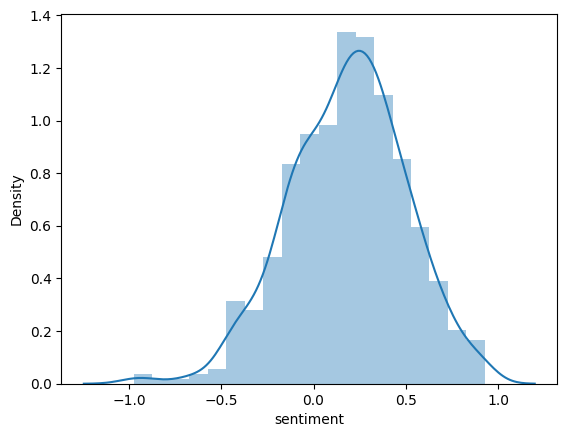

In [88]:
sns.distplot(final_df['sentiment'])

We can see we have a rough gaussian distribution, meaning we have an average with some outliers on both sides for both positive and negative. This means we can expect an interesting (hopefully) finding in our research. Now we will do a similar plot but this time we want to include all the politician names.

In [99]:
order = final_df.sort_values(by='sentiment', ascending=False)

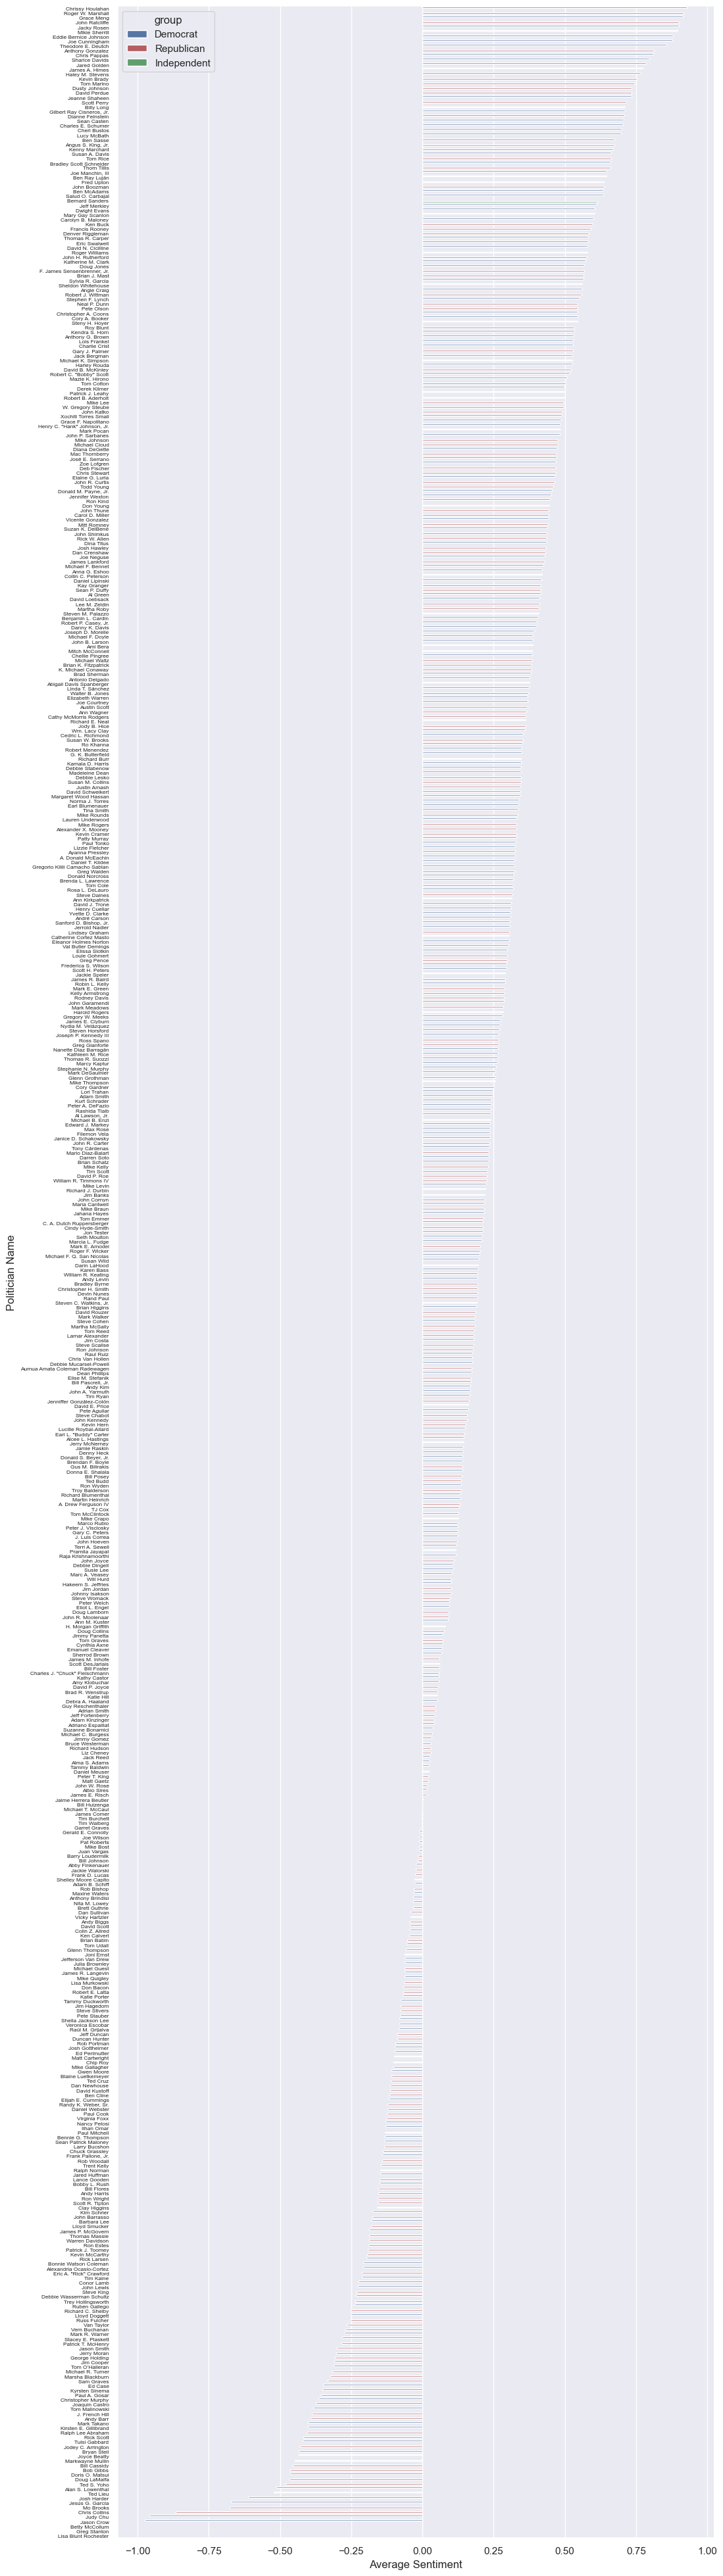

In [114]:
sns.set(rc={'figure.figsize':(11.7,50)})
sns.barplot(data=order, y='name', x='sentiment', hue='group', palette=["b", "r", "g"])
plt.ylabel('Politician Name')
plt.xlabel('Average Sentiment')
plt.tick_params(axis='y', which='major', labelsize=6)

As we can see in the graph (we know it's a bit big) we have an interesting distribution of the sentiment each politician has. We can see that politician Jason Cros has the lowest sentiment, while Chris Houlahan has the highest sentiment. It is interesting to note that both Greg Stanton and Lisa Blunt Rochester have a null sentiment, this is because the team found that all articles talking about them where behind paywall sites such as the new york times, and the budget provided by dtu (we wanted to say that) couldn't afford such expenses. For the rest of the project we will continue to work with them having a sentiment value of Null unless otherwise stated.

Now we will move on to the next part of the analysis, which is in our opinion the more interesting one, which is the analysis over the average sentiment in the parties.

## Party analysis

First and foremost we found an interesting thing on our previous analysis, and that is that we don't have only 2 parties, as one would expect of the US. We actually have 3 parties! This is an interesting finding, so therefore we want to see how many people are in the third party, called independent.

In [85]:
final_df[final_df['group'] == 'Independent']

,name,group,chamber,sentiment
1,"Angus S. King, Jr.",Independent,Senate,0.67335
4,Bernard Sanders,Independent,Senate,0.61454


We find that there are only 2 politicians that are independent (there goes our finding). This means we can't actually take it into account on our party analysis as only 2 candidates cannot represent a party. We will not exclude them from our graphs, but it will be mentioned that the independet "party" is no longer going to be considered for the findings of this project.

Now back to the main topic of this section, we want to see the average sentiment for our parties.

In [119]:
party_sentiment = final_df.groupby('group')['sentiment'].apply(np.mean)
party_sentiment = party_sentiment.to_frame()
party_sentiment = party_sentiment.reset_index()
party_sentiment = party_sentiment.sort_values(by='sentiment', ascending=False)
party_sentiment.head()

,group,sentiment
1,Independent,0.643945
0,Democrat,0.220190
2,Republican,0.140432


It is always good to find a picture to better represent this numbers before giving a conclusion.

Text(0.5, 0, 'Political Party')

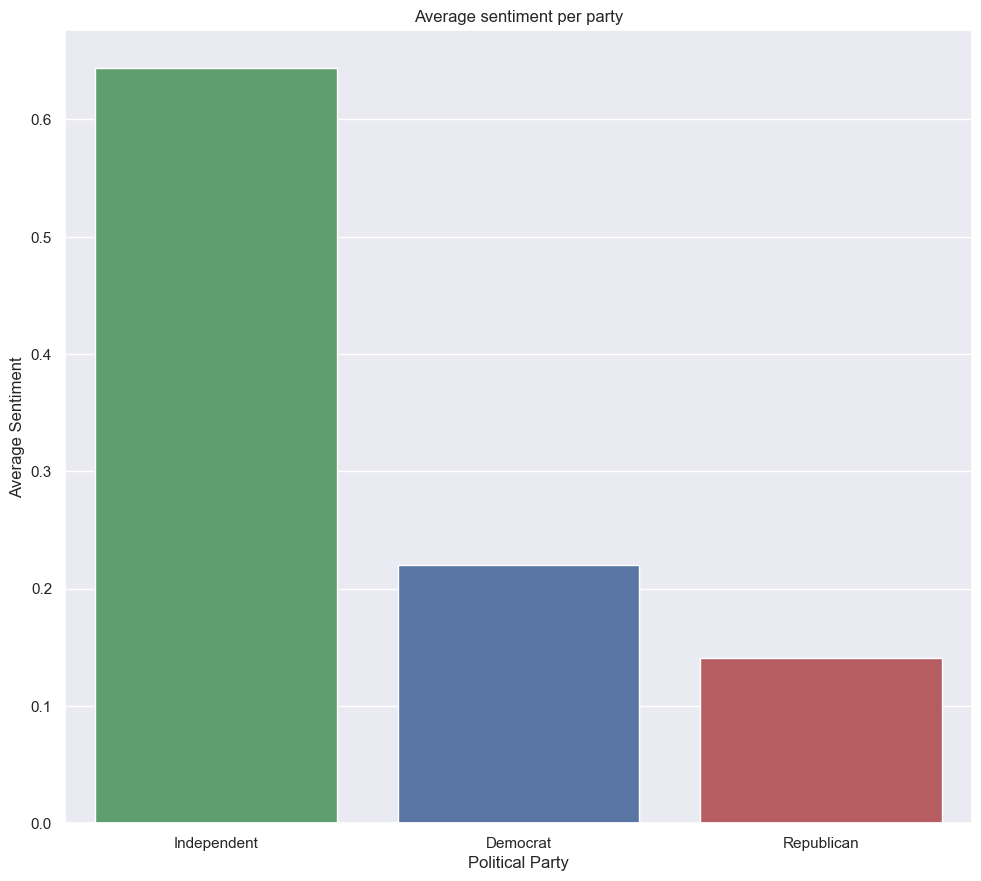

In [122]:
sns.set(rc={'figure.figsize':(11.7,10.3)})
sns.barplot(data=party_sentiment, x='group', y='sentiment', palette=["g", "b", "r"]).set_title('Average sentiment per party')
plt.ylabel('Average Sentiment')
plt.xlabel('Political Party')

### extra

In [123]:
final_df.head()

,name,group,chamber,sentiment
0,Amy Klobuchar,Democrat,Senate,0.057700
1,"Angus S. King, Jr.",Independent,Senate,0.673350
2,Ben Sasse,Republican,Senate,0.673833
3,Benjamin L. Cardin,Democrat,Senate,0.407100
4,Bernard Sanders,Independent,Senate,0.614540


In [143]:
test = final_df.groupby('group').agg({'sentiment':np.mean,'name':len})

In [145]:
test.reset_index(inplace=True)
test.rename(columns={'name':'member count','sentiment':'average sentiment','group':'party'}, inplace=True)

,party,average sentiment,member count
0,Democrat,0.220190,284
1,Independent,0.643945,2
2,Republican,0.140432,254


Text(0.5, 1.0, 'Average sentiment per party')

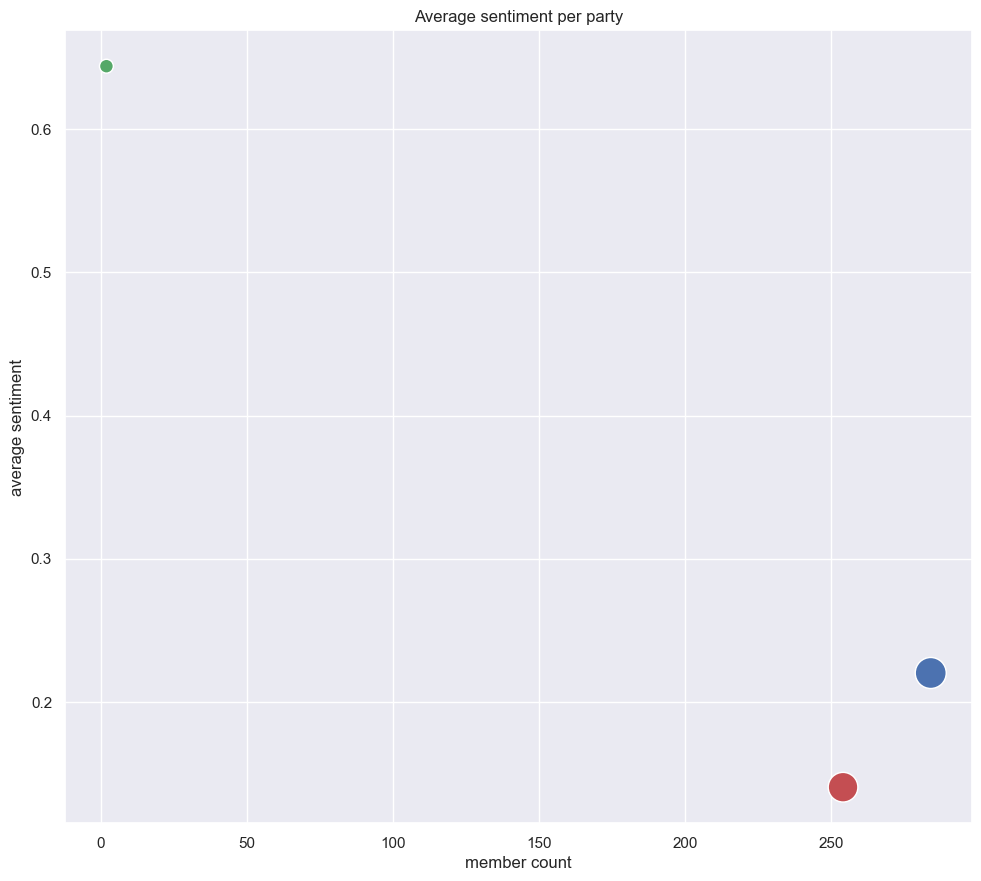

In [154]:
sns.scatterplot(data = test, x='member count', y='average sentiment', hue='party', palette=['b','g','r'], size='member count', sizes=(100, 500), legend=False).set_title('Average sentiment per party')

## 